In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from itertools import combinations

In [2]:
def spinless_sub_dim(N,r) : 
    '''
    input : number of lattice sites (N), number of electrons (r) 
    output : dimension of this subspace 
    '''
    return math.comb(N,r)


def hubb0_model(N,r,e,t,U): 
    ''' Generalised Tight Binding (spinless) model for periodic boundary condition
    Input : Number of lattice sites (int), number of electrons(int), hopping constant (int/float), onsite energies (list), interaction term U (int)
    Output : Tight binding Hamiltonian, eigenvalues and eigenvectors of the matrix ''' 
    dim = spinless_sub_dim(N,r)
    #Special Cases
    if r==0 : 
        H = np.zeros(1)
        eigval = 0
        new_vec = [[1]]
    elif r==N : 
        H = [[sum(e)+N*U]]
        eigval = H[0]
        new_vec = [[1]]
    if N == 1 and r==1: 
        H = [e]
        eigval = H[0]
        new_vec = [[1]]
    else : 
        H = np.zeros((dim, dim))
        basis_set = spinless_basis(N,r)
        #H_diagonal, onsite energy terms
        n_diag = np.zeros(dim)
        for i in range(dim) : 
            for j in range(N) : 
                n_diag[i] += e[j]*basis_set[i][j]
        np.fill_diagonal(H,n_diag)
        #H_T Hopping terms 
        for basis_index,basis in enumerate(basis_set) : 
            for site in range(len(basis)) : 
                if basis[site] == False and basis[(site+1)%N] == True : 
                    new_state = basis.copy()
                    new_state[site] = True
                    new_state[(site+1)%N] = False 
                    for i in range(len(basis_set)) : 
                        if basis_set[i] == new_state: 
                            f_index = i
                    H[f_index][basis_index] +=t
                if N != 2 : 
                    if basis[site] == True and basis[(site+1)%N] == False : 
                        new_state = basis.copy()
                        new_state[site] = False
                        new_state[(site+1)%N] = True 
                        for i in range(len(basis_set)) : 
                            if basis_set[i] == new_state : 
                                f_index = i
                        H[f_index][basis_index] +=t 
        #H_U, interaction terms
        for basis_index,basis in enumerate(basis_set) : 
            for site in range(len(basis)) : 
                if basis[site] == True and basis[(site+1)%N] == True : 
                    H[basis_index][basis_index] +=U

        eigval,eigvec = np.linalg.eigh(H)
        new_vec = list(zip(*eigvec))                   
    return H,eigval,new_vec



In [3]:
path01 = "U0.csv"
path02 = "U1.csv"
path03="U3.csv"
path04="U6.csv"

df01 = pd.read_csv(path01)
df02 = pd.read_csv(path02)
df03 = pd.read_csv(path03)
df04 = pd.read_csv(path04)

df_list = [df01,df02,df03,df04]

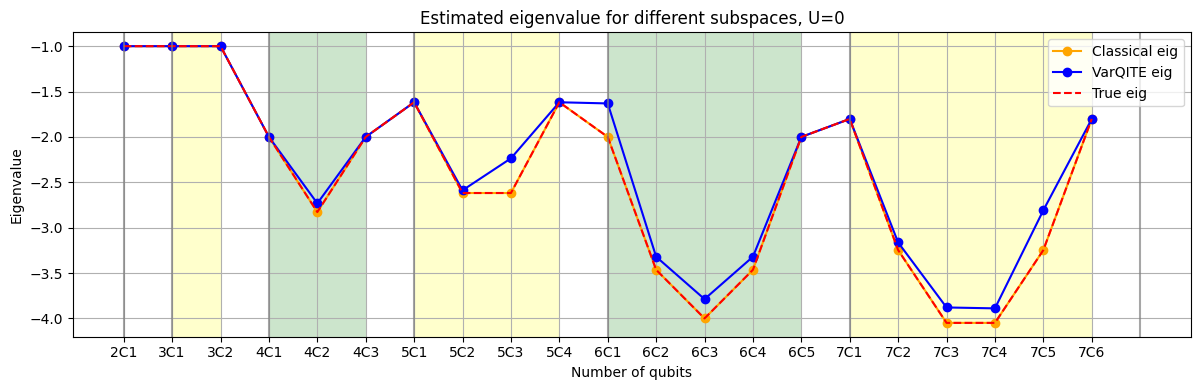

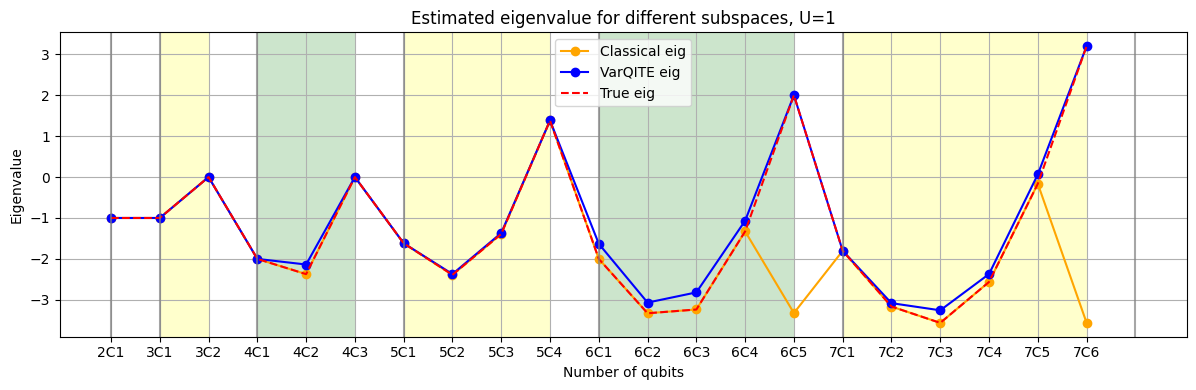

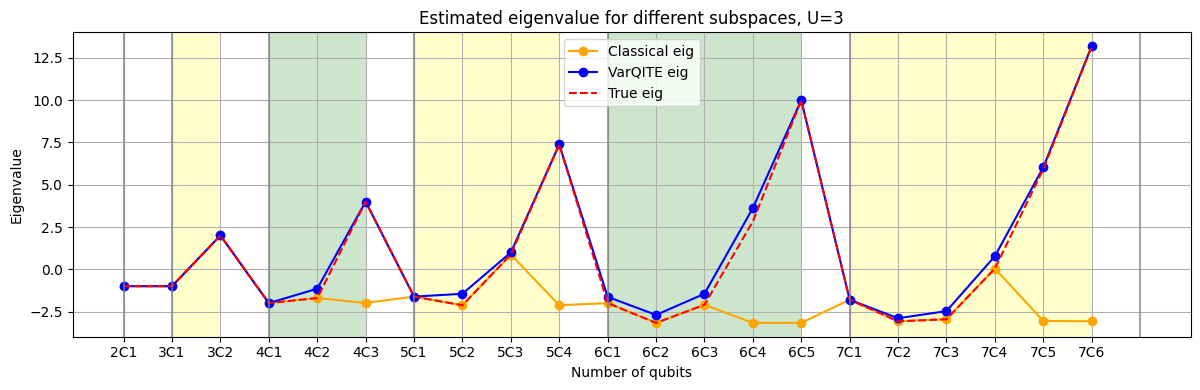

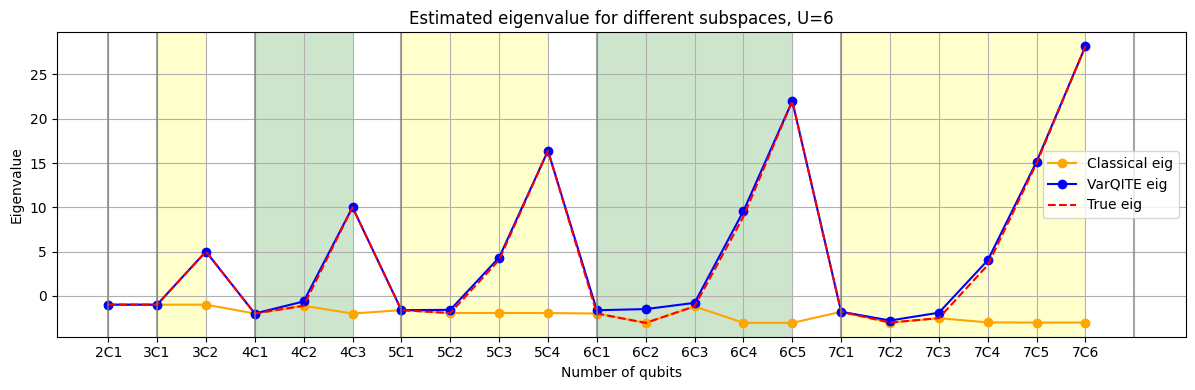

In [40]:
U = [0,1,3,6]
import matplotlib.gridspec as gridspec
for ind,df in enumerate(df_list) : 
    fig = plt.figure(figsize=(18, 4))
    gs = gridspec.GridSpec(1, 3, width_ratios=[4, 1, 1])
    
    eig_c = df['eig_c']
    eig_q = df['eig_q']
    eig_true = df['eig_true']
    N = df['N']
    #xticks = [0,1,3,6,10,15]
    

    comb = []
    for num in df['N'].unique() : 
        sub_list = [f'{num}C{i}' for i in range(1,num)]
        comb += sub_list
    #xtick_labels = [comb[i] for i in xticks]
    time_c = df['time_clas']
    time_q = df['time_q']
    
    axs0 = plt.subplot(gs[0])
    axs0.plot(comb, eig_c, label='Classical eig', color='orange', marker='o')
    axs0.plot(comb, eig_q, label='VarQITE eig', color='blue',marker='o')
    axs0.plot(comb, eig_true, label='True eig', color='red',linestyle='--')
    axs0.plot
    axs0.set_xlabel('Number of qubits')
    axs0.set_ylabel('Eigenvalue')
    axs0.set_title(f'Estimated eigenvalue for different subspaces, U={U[ind]}')
    axs0.grid(True)
#     axs0.set_xticks(xticks)
#     axs0.set_xticklabels(xtick_labels)
    axs0.legend()
    
    colors = ['green', 'yellow']
    partitions = [0,1,3,6,10,15,21]
    #partitions = [p-1 for p in partitions]
    for a in partitions:
        plt.axvline(x=a, color='gray', alpha=0.7)
    for i in range(1,6) : 
        axs0.axvspan(partitions[i], partitions[i+1]-1, facecolor=colors[i%2], alpha=0.2)

#     for i in range(len(partitions)):
#         axs0.plot(x_values[i:i+2], y_values[i:i+2], linestyle='none', marker='o', markersize=8)

    plt.tight_layout()
    plt.show()

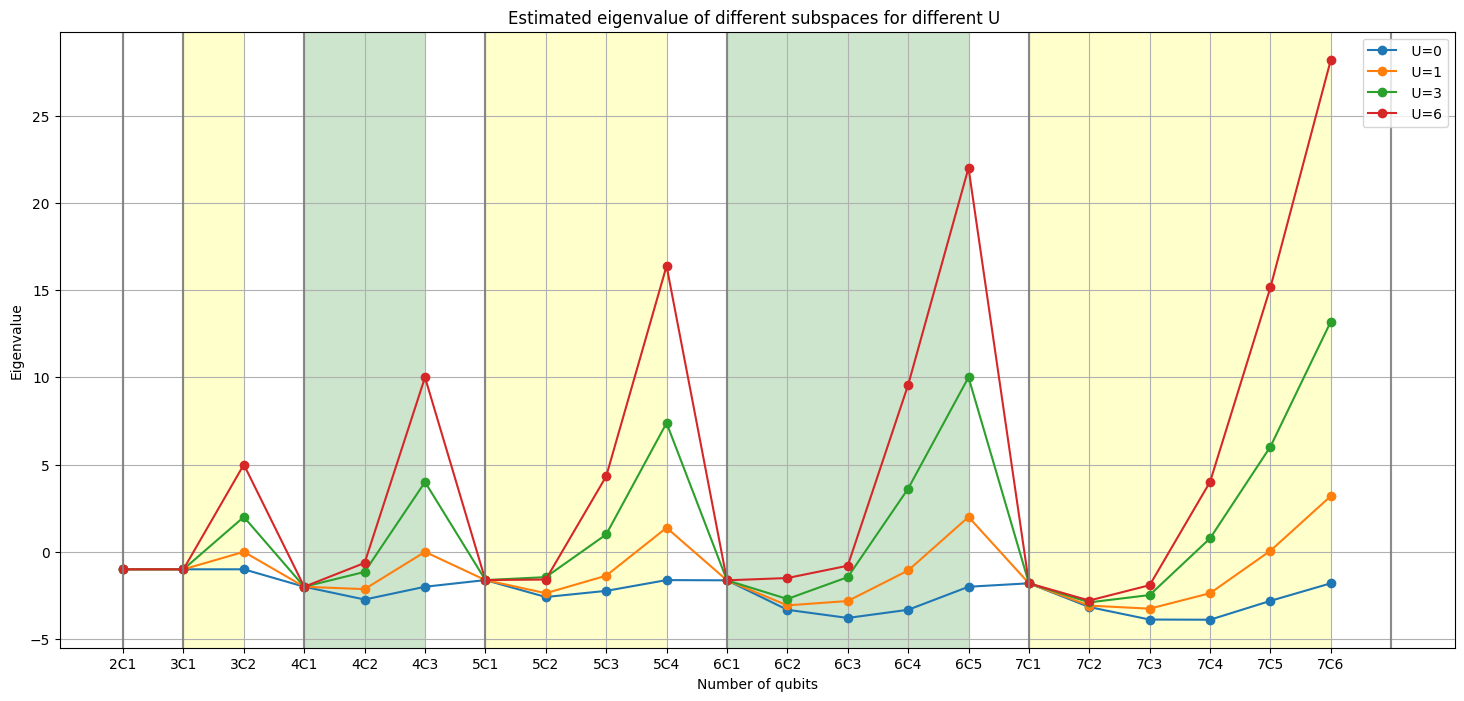

In [37]:
U = [0,1,3,6]

plt.figure(figsize=(18, 8))

eigq_list = [df['eig_q'] for df in df_list]
for idx,eig_q in enumerate(eigq_list) : 

    N = df['N']
    #xticks = [0,1,3,6,10,15]
    

    comb = []
    for num in df['N'].unique() : 
        sub_list = [f'{num}C{i}' for i in range(1,num)]
        comb += sub_list

    #axs0.plot(comb, eig_c, label='Classical eig', color='orange', marker='o')
    plt.plot(comb, eig_q, label=f' U={U[idx]}',marker='o')
    #axs0.plot(comb, eig_true, label='True eig', color='red',linestyle='--')
    
for a in partitions:
    plt.axvline(x=a, color='gray', alpha=0.7)

plt.xlabel('Number of qubits')
plt.ylabel('Eigenvalue')
plt.title(f'Estimated eigenvalue of different subspaces for different U ')
plt.grid(True)
#     axs0.set_xticks(xticks)
#     axs0.set_xticklabels(xtick_labels)
plt.legend()

colors = ['green', 'yellow']
partitions = [0,1,3,6,10,15,21]

for a in partitions:
    plt.axvline(x=a, color='gray', alpha=0.7)
for i in range(1,6) : 
    plt.axvspan(partitions[i], partitions[i+1]-1, facecolor=colors[i%2], alpha=0.2)


plt.show()